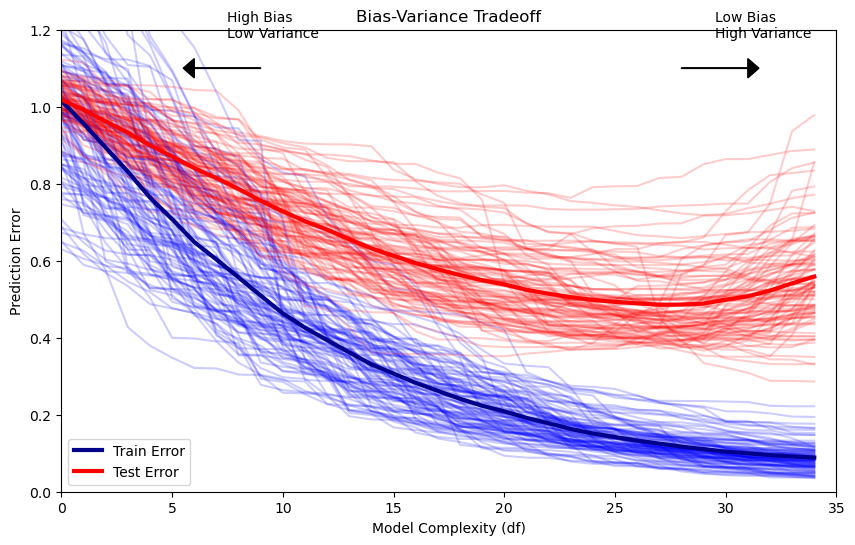

In [ ]:
# This script simulates the bias-variance tradeoff using the LassoLars regression model.
# It generates synthetic data, splits it into training and test sets, and fits LassoLars models.
# The training and test residual sum of squares (RSS) are computed across varying model complexities.
# The results are averaged over 100 experiments and visualized to illustrate the tradeoff.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import tensorflow as tf
from sklearn.metrics import log_loss

# Set random seed for reproducibility
np.random.seed(7)

# Experiment parameters
train_size = 50
test_size = 1000
N = train_size + test_size
num_vars = 35  # Number of variables
num_experiments = 100  # Number of experiments

# Standard deviations for data generation
sd_X = 1  # Standard deviation of predictors
sd_beta = 0.145  # Standard deviation of true coefficients
sd_noise = 0.45  # Standard deviation of noise

# Arrays to store RSS for each experiment
train_RSS_df = np.zeros((num_experiments, num_vars))
test_RSS_df = np.zeros((num_experiments, num_vars))

# Generate true beta coefficients
beta = np.random.normal(scale=sd_beta, size=(num_vars, 1))

# Initialize plot
plt.figure(figsize=(10, 6))
plt.ylim(0, 1.2)
plt.xlim(0, num_vars)
plt.xlabel('Model Complexity (df)')
plt.ylabel('Prediction Error')

# Perform 100 experiments
for i in range(num_experiments):
    # Generate noise and predictor matrix
    noise = np.random.normal(scale=sd_noise, size=(N, 1))
    X = np.random.normal(scale=sd_X, size=(N, num_vars))
    Y = X @ beta + noise  # Generate response variable

    # Split into training and testing sets
    train_X, test_X = X[:train_size, :], X[train_size:, :]
    train_Y, test_Y = Y[:train_size], Y[train_size:]

    # Standardize the data
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Fit LassoLars model
    model = LassoLars(alpha=0, fit_intercept=False)
    model.fit(train_X, train_Y.ravel())

    # Get alphas, active set, and coefficient path
    alphas, active, coefs = model.alphas_, model.active_, model.coef_path_.T
    num_steps = len(alphas)

    # Compute RSS for each model on the training set
    train_predictions = np.dot(train_X, coefs.T)
    train_RSS = np.mean((train_predictions - train_Y) ** 2, axis=0)

    # Compute RSS for each model on the testing set
    test_predictions = np.dot(test_X, coefs.T)
    test_RSS = np.mean((test_predictions - test_Y) ** 2, axis=0)

    # Ensure only the first 35 steps are stored (truncate if necessary)
    train_RSS_df[i, :] = train_RSS[:num_vars]
    test_RSS_df[i, :] = test_RSS[:num_vars]

    # Plot RSS curves for this experiment
    plt.plot(train_RSS[:num_vars], color='blue', alpha=0.2)
    plt.plot(test_RSS[:num_vars], color='red', alpha=0.2)

# Compute average RSS across all experiments
avg_train_RSS = np.mean(train_RSS_df, axis=0)
avg_test_RSS = np.mean(test_RSS_df, axis=0)

# Plot average RSS curves
plt.plot(avg_train_RSS, color='darkblue', linewidth=3, label='Train Error')
plt.plot(avg_test_RSS, color='red', linewidth=3, label='Test Error')

# Add annotations and arrows
plt.text(7.5, 1.18, 'High Bias\nLow Variance', fontsize=10)
plt.arrow(9, 1.1, -3, 0, head_width=0.05, head_length=0.5, fc='black', ec='black')

plt.text(29.5, 1.18, 'Low Bias\nHigh Variance', fontsize=10)
plt.arrow(28, 1.1, 3, 0, head_width=0.05, head_length=0.5, fc='black', ec='black')

plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:

# This script evaluates binary classification performance on two datasets.
# It prints examples of TP, TN, FP, and FN, computes classification metrics manually,
# and compares results with sklearn and TensorFlow implementations.

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

# Load dataset
data1 = pd.read_csv('~/Desktop/UCHI/ML1/hw1 /binomial-classification-v1.csv')
dt = pd.read_csv('~/Desktop/UCHI/ML1/hw1 /binomial-classification-v2.csv')

# Extract actual and predicted values
actual1 = data1['actual'].values
predicted1 = data1['predicted'].values
actual2 = dt['actual'].values
predicted2 = dt['predicted'].values

# Print one record for TP, TN, FP, FN for both datasets
def print_records(data):
    tp_record = data[(data['actual'] == 1) & (data['predicted'] == 1)].iloc[0]
    tn_record = data[(data['actual'] == 0) & (data['predicted'] == 0)].iloc[0]
    fp_record = data[(data['actual'] == 0) & (data['predicted'] == 1)].iloc[0]
    fn_record = data[(data['actual'] == 1) & (data['predicted'] == 0)].iloc[0]
    print("True Positive (TP):", tp_record)
    print("True Negative (TN):", tn_record)
    print("False Positive (FP):", fp_record)
    print("False Negative (FN):", fn_record)

print("Dataset 1:")
print_records(data1)
print("\nDataset 2:")
print_records(dt)

# Manually compute metrics
def compute_metrics(actual, predicted):
    tp = np.sum((actual == 1) & (predicted == 1))
    tn = np.sum((actual == 0) & (predicted == 0))
    fp = np.sum((actual == 0) & (predicted == 1))
    fn = np.sum((actual == 1) & (predicted == 0))
    return tp, tn, fp, fn

def manual_metrics(actual, predicted):
    tp, tn, fp, fn = compute_metrics(actual, predicted)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1

accuracy_manual1, precision_manual1, recall_manual1, f1_score_manual1 = manual_metrics(actual1, predicted1)
accuracy_manual2, precision_manual2, recall_manual2, f1_score_manual2 = manual_metrics(actual2, predicted2)

print("\nPart 2: Manual Metrics for Dataset 1")
print(f"Accuracy: {accuracy_manual1}")
print(f"Precision: {precision_manual1}")
print(f"Recall: {recall_manual1}")
print(f"F1-Score: {f1_score_manual1}")

print("\nPart 2: Manual Metrics for Dataset 2")
print(f"Accuracy: {accuracy_manual2}")
print(f"Precision: {precision_manual2}")
print(f"Recall: {recall_manual2}")
print(f"F1-Score: {f1_score_manual2}")

# Compute metrics using sklearn and tensorflow
def sklearn_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    return accuracy, precision, recall, f1

accuracy_sklearn1, precision_sklearn1, recall_sklearn1, f1_score_sklearn1 = sklearn_metrics(actual1, predicted1)
accuracy_sklearn2, precision_sklearn2, recall_sklearn2, f1_score_sklearn2 = sklearn_metrics(actual2, predicted2)

print("\nPart 3: Sklearn Metrics for Dataset 1")
print(f"Accuracy: {accuracy_sklearn1}")
print(f"Precision: {precision_sklearn1}")
print(f"Recall: {recall_sklearn1}")
print(f"F1-Score: {f1_score_sklearn1}")

print("\nPart 3: Sklearn Metrics for Dataset 2")
print(f"Accuracy: {accuracy_sklearn2}")
print(f"Precision: {precision_sklearn2}")
print(f"Recall: {recall_sklearn2}")
print(f"F1-Score: {f1_score_sklearn2}")

# TensorFlow metrics
def tensorflow_metrics(actual, predicted):
    accuracy_tf = tf.keras.metrics.Accuracy()
    accuracy_tf.update_state(actual, predicted)
    accuracy_result = accuracy_tf.result().numpy()

    precision_tf = tf.keras.metrics.Precision()
    precision_tf.update_state(actual, predicted)
    precision_result = precision_tf.result().numpy()

    recall_tf = tf.keras.metrics.Recall()
    recall_tf.update_state(actual, predicted)
    recall_result = recall_tf.result().numpy()

    f1_result = 2 * (precision_result * recall_result) / (precision_result + recall_result)
    return accuracy_result, precision_result, recall_result, f1_result

accuracy_tf1, precision_tf1, recall_tf1, f1_score_tf1 = tensorflow_metrics(actual1, predicted1)
accuracy_tf2, precision_tf2, recall_tf2, f1_score_tf2 = tensorflow_metrics(actual2, predicted2)

print("\nPart 3: TensorFlow Metrics for Dataset 1")
print(f"Accuracy: {accuracy_tf1}")
print(f"Precision: {precision_tf1}")
print(f"Recall: {recall_tf1}")
print(f"F1-Score: {f1_score_tf1}")

print("\nPart 3: TensorFlow Metrics for Dataset 2")
print(f"Accuracy: {accuracy_tf2}")
print(f"Precision: {precision_tf2}")
print(f"Recall: {recall_tf2}")
print(f"F1-Score: {f1_score_tf2}")

# Compare all metrics
compare_results1 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Manual (Dataset 1)": [accuracy_manual1, precision_manual1, recall_manual1, f1_score_manual1],
    "Sklearn (Dataset 1)": [accuracy_sklearn1, precision_sklearn1, recall_sklearn1, f1_score_sklearn1],
    "TensorFlow (Dataset 1)": [accuracy_tf1, precision_tf1, recall_tf1, f1_score_tf1]
})

compare_results2 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Manual (Dataset 2)": [accuracy_manual2, precision_manual2, recall_manual2, f1_score_manual2],
    "Sklearn (Dataset 2)": [accuracy_sklearn2, precision_sklearn2, recall_sklearn2, f1_score_sklearn2],
    "TensorFlow (Dataset 2)": [accuracy_tf2, precision_tf2, recall_tf2, f1_score_tf2]
})

print("\nPart 4: Comparison of Metrics for Dataset 1")
print(compare_results1)

print("\nPart 4: Comparison of Metrics for Dataset 2")
print(compare_results2)

Dataset 1:
True Positive (TP): Unnamed: 0    20
actual         1
predicted      1
Name: 20, dtype: int64
True Negative (TN): Unnamed: 0    10
actual         0
predicted      0
Name: 10, dtype: int64
False Positive (FP): Unnamed: 0    1
actual        0
predicted     1
Name: 1, dtype: int64
False Negative (FN): Unnamed: 0    0
actual        1
predicted     0
Name: 0, dtype: int64

Dataset 2:
True Positive (TP): Unnamed: 0    11
actual         1
predicted      1
Name: 11, dtype: int64
True Negative (TN): Unnamed: 0    0
actual        0
predicted     0
Name: 0, dtype: int64
False Positive (FP): Unnamed: 0    79
actual         0
predicted      1
Name: 79, dtype: int64
False Negative (FN): Unnamed: 0    10
actual         1
predicted      0
Name: 10, dtype: int64

Part 2: Manual Metrics for Dataset 1
Accuracy: 0.048604860486048604
Precision: 0.046511627906976744
Recall: 0.04650230507115655
F1-Score: 0.04650696602185026

Part 2: Manual Metrics for Dataset 2
Accuracy: 0.9484948494849484
Precisi

In [ ]:
# This script computes log loss for a binary classification dataset.
# It manually calculates log loss, then compares results with sklearn and TensorFlow implementations.

import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
import tensorflow as tf

# Load dataset
data2 = pd.read_csv('~/Desktop/UCHI/ML1/hw1 /binomial-classification-v3.csv')

# Extract columns based on dataset structure
actual = data2['y1'].values  # Column for true labels
predicted_probs = data2['p1'].values  # Column for predicted probabilities

# Manual Log Loss Computation
epsilon = 1e-15  # To avoid log(0)
predicted_probs_clipped = np.clip(predicted_probs, epsilon, 1 - epsilon)
log_loss_manual = -np.mean(
    actual * np.log(predicted_probs_clipped) +
    (1 - actual) * np.log(1 - predicted_probs_clipped)
)
print("\nPart 1: Manual Log Loss")
print(f"Log Loss (Manual): {log_loss_manual}")

# Log Loss using sklearn
log_loss_sklearn = log_loss(actual, predicted_probs)
print("\nPart 2: Log Loss with sklearn")
print(f"Log Loss (Sklearn): {log_loss_sklearn}")

# Log Loss using tensorflow
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
log_loss_tf = loss_fn(tf.constant(actual, dtype=tf.float32),
                      tf.constant(predicted_probs, dtype=tf.float32)).numpy()
print("\nPart 3: Log Loss with TensorFlow")
print(f"Log Loss (TensorFlow): {log_loss_tf}")


Part 1: Manual Log Loss
Log Loss (Manual): 0.31998196154710273

Part 2: Log Loss with sklearn
Log Loss (Sklearn): 0.31998196154710273

Part 3: Log Loss with TensorFlow
Log Loss (TensorFlow): 0.31998199224472046


In [ ]:
# This script computes regression metrics manually and compares results with sklearn and TensorFlow implementations.

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import tensorflow as tf

# Load the dataset
data3 = pd.read_csv('~/Desktop/UCHI/ML1/hw1 /regression-v1.csv')

# Extract actual and predicted values
actual = data3['y'].values  # Use column 'y' for actual values
predicted = data3['yhat'].values  # Use column 'yhat' for predicted values

# Manual Computation of Regression Metrics
# Mean Absolute Error (MAE)
mae_manual = np.mean(np.abs(actual - predicted))

# Mean Squared Error (MSE)
mse_manual = np.mean((actual - predicted) ** 2)

# R^2 Score
ss_total = np.sum((actual - np.mean(actual)) ** 2)
ss_residual = np.sum((actual - predicted) ** 2)
r2_manual = 1 - (ss_residual / ss_total)

# Explained Variance Score
explained_variance_manual = 1 - (np.var(actual - predicted) / np.var(actual))

# Mean Absolute Percentage Error (MAPE)
mape_manual = np.mean(np.abs((actual - predicted) / actual)) * 100

print("\nPart 1: Manual Computation Results")
print(f"Mean Absolute Error (Manual): {mae_manual}")
print(f"Mean Squared Error (Manual): {mse_manual}")
print(f"R^2 Score (Manual): {r2_manual}")
print(f"Explained Variance (Manual): {explained_variance_manual}")
print(f"Mean Absolute Percentage Error (Manual): {mape_manual}")

# Compute Regression Metrics using sklearn
mae_sklearn = mean_absolute_error(actual, predicted)
mse_sklearn = mean_squared_error(actual, predicted)
r2_sklearn = r2_score(actual, predicted)
explained_variance_sklearn = explained_variance_score(actual, predicted)
# MAPE is not directly available in sklearn
mape_sklearn = np.mean(np.abs((actual - predicted) / actual)) * 100

print("\nPart 2: Sklearn Computation Results")
print(f"Mean Absolute Error (Sklearn): {mae_sklearn}")
print(f"Mean Squared Error (Sklearn): {mse_sklearn}")
print(f"R^2 Score (Sklearn): {r2_sklearn}")
print(f"Explained Variance (Sklearn): {explained_variance_sklearn}")
print(f"Mean Absolute Percentage Error (Sklearn): {mape_sklearn}")

# Compute Regression Metrics using TensorFlow
actual_tf = tf.constant(actual, dtype=tf.float32)
predicted_tf = tf.constant(predicted, dtype=tf.float32)

# Mean Absolute Error (MAE)
mae_tf = tf.reduce_mean(tf.abs(actual_tf - predicted_tf)).numpy()

# Mean Squared Error (MSE)
mse_tf = tf.reduce_mean(tf.square(actual_tf - predicted_tf)).numpy()

# R^2 Score
ss_total_tf = tf.reduce_sum(tf.square(actual_tf - tf.reduce_mean(actual_tf)))
ss_residual_tf = tf.reduce_sum(tf.square(actual_tf - predicted_tf))
r2_tf = 1 - (ss_residual_tf / ss_total_tf).numpy()

# Explained Variance Score
explained_variance_tf = 1 - (tf.math.reduce_variance(actual_tf - predicted_tf) / tf.math.reduce_variance(actual_tf)).numpy()

# Mean Absolute Percentage Error (MAPE)
mape_tf = tf.reduce_mean(tf.abs((actual_tf - predicted_tf) / actual_tf)).numpy() * 100

print("\nPart 3: TensorFlow Computation Results")
print(f"Mean Absolute Error (TensorFlow): {mae_tf}")
print(f"Mean Squared Error (TensorFlow): {mse_tf}")
print(f"R^2 Score (TensorFlow): {r2_tf}")
print(f"Explained Variance (TensorFlow): {explained_variance_tf}")
print(f"Mean Absolute Percentage Error (TensorFlow): {mape_tf}")


Part 1: Manual Computation Results
Mean Absolute Error (Manual): 0.12176198368693504
Mean Squared Error (Manual): 0.022933380701432377
R^2 Score (Manual): 0.9074006311244875
Explained Variance (Manual): 0.9075476866547145
Mean Absolute Percentage Error (Manual): 264.1838975226423

Part 2: Sklearn Computation Results
Mean Absolute Error (Sklearn): 0.12176198368693504
Mean Squared Error (Sklearn): 0.022933380701432377
R^2 Score (Sklearn): 0.9074006311244875
Explained Variance (Sklearn): 0.9075476866547145
Mean Absolute Percentage Error (Sklearn): 264.1838975226423

Part 3: TensorFlow Computation Results
Mean Absolute Error (TensorFlow): 0.1217619776725769
Mean Squared Error (TensorFlow): 0.02293338254094124
R^2 Score (TensorFlow): 0.9074006229639053
Explained Variance (TensorFlow): 0.9075476825237274
Mean Absolute Percentage Error (TensorFlow): 264.1839265823364


In [ ]:
# This script computes log loss (multinomial cross-entropy) manually and compares results with sklearn and TensorFlow implementations.

import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
import tensorflow as tf

# Load the dataset
data_multinomial = pd.read_csv('~/Desktop/UCHI/ML1/hw1 /multinomial-classification-v1.csv')

# Extract relevant columns
true_labels = data_multinomial[['y1', 'y2', 'y3']].values  # One-hot encoded true labels
predicted_probs = data_multinomial[['p1', 'p2', 'p3']].values  # Predicted probabilities

# Compute Multinomial Cross Entropy manually
epsilon = 1e-15  # To avoid log(0)
predicted_probs_clipped = np.clip(predicted_probs, epsilon, 1 - epsilon)  # Clip probabilities
log_loss_manual = -np.mean(np.sum(true_labels * np.log(predicted_probs_clipped), axis=1))
print(f"Log Loss (Manual Calculation): {log_loss_manual}")

# Compare with sklearn's log_loss
log_loss_sklearn = log_loss(true_labels, predicted_probs)
print(f"Log Loss (sklearn): {log_loss_sklearn}")

# Compare with TensorFlow's CategoricalCrossentropy
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
log_loss_tf = loss_fn(tf.constant(true_labels, dtype=tf.float32),
                      tf.constant(predicted_probs, dtype=tf.float32)).numpy()
print(f"Log Loss (TensorFlow): {log_loss_tf}")


Log Loss (Manual Calculation): 0.5372268227719148
Log Loss (sklearn): 0.5372268227719147
Log Loss (TensorFlow): 0.5372267961502075
